In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from time import sleep

In [2]:
from gadget_tools import Snapshot, read_positions_all_files

In [3]:
from pm_tools import assign_density

In [4]:
import yt
# import numpy as np
# import yt.units as units
# import pylab

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [5]:
L=150
N=512
i=10

In [6]:
posd = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo')

/scratch/cprem/sims/L150_N512_Cp18_bar/r1/snaps/snapdir_010/snapshot_010.0.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N512_Cp18_bar/r1/snaps/snapdir_010/snapshot_010.1.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N512_Cp18_bar/r1/snaps/snapdir_010/snapshot_010.2.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N512_Cp18_bar/r1/snaps/snapdir_010/snapshot_010.3.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N512_Cp18_bar/r1/snaps/snapdir_010/snapshot_010.4.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N512_Cp18_bar/r1/snaps/snapdir_010/snapshot_010.5.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N512_Cp18_bar/r1/snaps/snap

In [7]:
# posb = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Gas')

In [17]:
deltad = assign_density(posd, L, scheme='NGP')#, overdensity=False)

In [18]:
# deltab = assign_density(posb, L, scheme='NGP')

In [19]:
deltad_slice = deltad[100:150].mean(axis=0)

In [20]:
# deltab_slice = deltab[100:150].mean(axis=0)

In [21]:
deltad_slice

array([[-0.3800062, -0.4600054, -0.4200058, ..., -0.0600094,  0.6799832,
        -0.1800082],
       [-0.400006 , -0.2600074, -0.6200038, ..., -0.500005 , -0.500005 ,
        -0.5400046],
       [-0.6400036, -0.2800072, -0.5600044, ..., -0.6400036, -0.2800072,
        -0.7400026],
       ...,
       [-0.1400086, -0.2600074, -0.1600084, ..., -0.2800072, -0.2600074,
        -0.5200048],
       [-0.2800072, -0.2400076, -0.1400086, ..., -0.100009 , -0.5600044,
        -0.3200068],
       [-0.2600074, -0.2800072, -0.1600084, ..., -0.3600064, -0.5600044,
        -0.1800082]])

In [24]:
data = dict(density = (1+deltad, "dimensionless"))
bbox = np.array([[0, 1], [0, 1], [0, 1]])*L
ds = yt.load_uniform_grid(data, deltad.shape, length_unit="Mpc", bbox=bbox, nprocs=32)

yt : [INFO     ] 2021-03-09 18:27:42,792 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-03-09 18:27:42,793 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2021-03-09 18:27:42,794 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-09 18:27:42,795 Parameters: domain_right_edge         = [150. 150. 150.]
yt : [INFO     ] 2021-03-09 18:27:42,796 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2021-03-09 18:38:58,416 xlim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,418 ylim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,419 xlim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,420 ylim = 25.000000 175.000000
yt : [INFO     ] 2021-03-09 18:38:58,421 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2021-03-09 18:38:58,889 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,891 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,893 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,895 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,897 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2021-03-09 18:38:58,899 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WAR


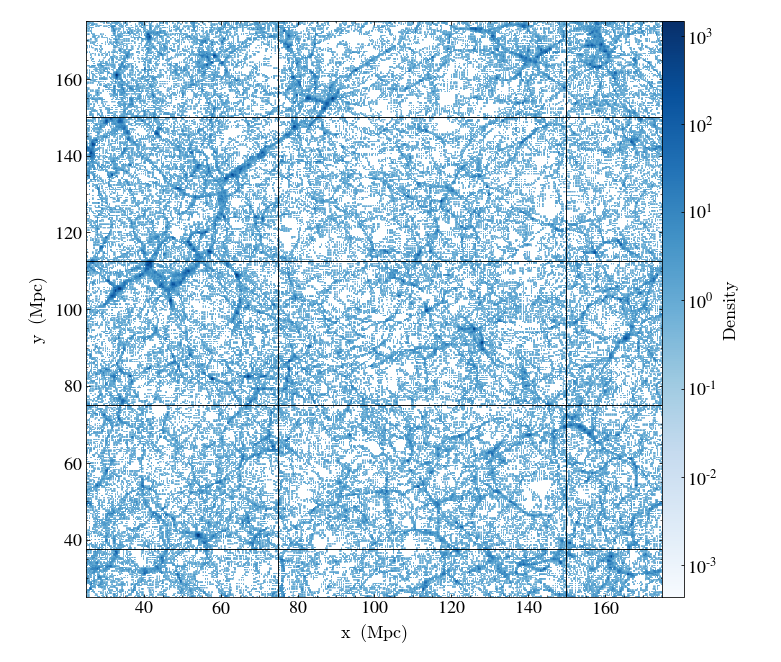

In [46]:
slc = yt.SlicePlot(ds, "z", ["density"], origin='lower-left-domain', width=(150,150), center=(100,100,50))
slc.set_cmap("density", "Blues")
slc.annotate_grids(cmap=None)
slc.show()

In [68]:
fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(7.5,4), dpi=150)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [69]:
im1 = ax1.imshow(deltad_slice+1, norm=LogNorm(vmin=5e-2,vmax=5e2), cmap='inferno')
cb1 = fig1.colorbar(im1,ax=ax1)
# cb1.set_label(r"$(1+\delta)$")

In [70]:
im2 = ax2.imshow(deltab_slice+1, norm=LogNorm(vmin=5e-2,vmax=5e2), cmap='inferno', alpha=1)
cb2 = fig1.colorbar(im2,ax=ax2)
cb2.set_label(r"$(1+\delta)$")

In [15]:
# snap = Snapshot('/mnt/home/student/cprem/tools/dice/example/dice_iso.g2')

reading the first block (header) which contains  [8]  bytes
Header block is read and it contains  0 bytes.


In [17]:
# snap.positions()